In [1]:
# import libraries
import pandas as pd
import numpy as np

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

# Suppress Scientific Notation in Numpy
np.set_printoptions(suppress=True)

# Suppress Scientific Notation in Pandas
pd.set_option('display.float_format', '{:.2f}'.format)

import scipy.stats as stats
from scipy.special import inv_boxcox

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Classfication
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [2]:
# Loading the Dataset
df = pd.read_csv("D:\Data\Machine_Learning\dataframe_.csv")

### Inspecting the dataset

In [3]:
df.head()

,input,output
0,-122.74,-130.57
1,-121.53,-129.94
2,-134.92,-130.14
3,-120.61,-125.76
4,-129.89,-112.79


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.describe()

,input,output
count,1696.00,1696.00
mean,1.16,-34.09
std,79.01,65.77
min,-134.96,-132.42
25%,-63.39,-80.03
50%,10.20,-50.47
75%,70.26,-11.00
max,134.61,134.43


### Data Cleaning

In [6]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1692     True
1693     True
1694     True
1695     True
1696     True
Length: 1697, dtype: bool

False    1091
True      606
dtype: int64

In [7]:
df[df.duplicated()]

,input,output
106,-63.37,-33.00
464,112.63,103.00
715,-31.37,-49.00
819,-117.37,-75.00
865,-131.37,-125.00
...,...,...
1692,25.41,-76.38
1693,29.54,-82.80
1694,31.63,-87.00
1695,29.09,-104.94


In [8]:
# Droping the duplicates

df.drop_duplicates(keep = 'first', inplace=True)
df.reset_index(inplace=True)

In [9]:
df.drop(['index'], axis=1, inplace=True)

### Checking the Missing Values

In [10]:
df.isna().sum()

input     1
output    1
dtype: int64

In [11]:
df[df.input.isna()]

,input,output
1090,NaN,NaN


In [12]:
df.mean()
df.median()

input      8.12
output   -27.38
dtype: float64

input     17.46
output   -46.30
dtype: float64

In [13]:
df.input.fillna(df.input.median(), inplace=True)
df.output.fillna(df.output.median(), inplace=True)

In [14]:
df.isna().sum()

input     0
output    0
dtype: int64

In [15]:
# To Check Wheather the Corrupted Values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


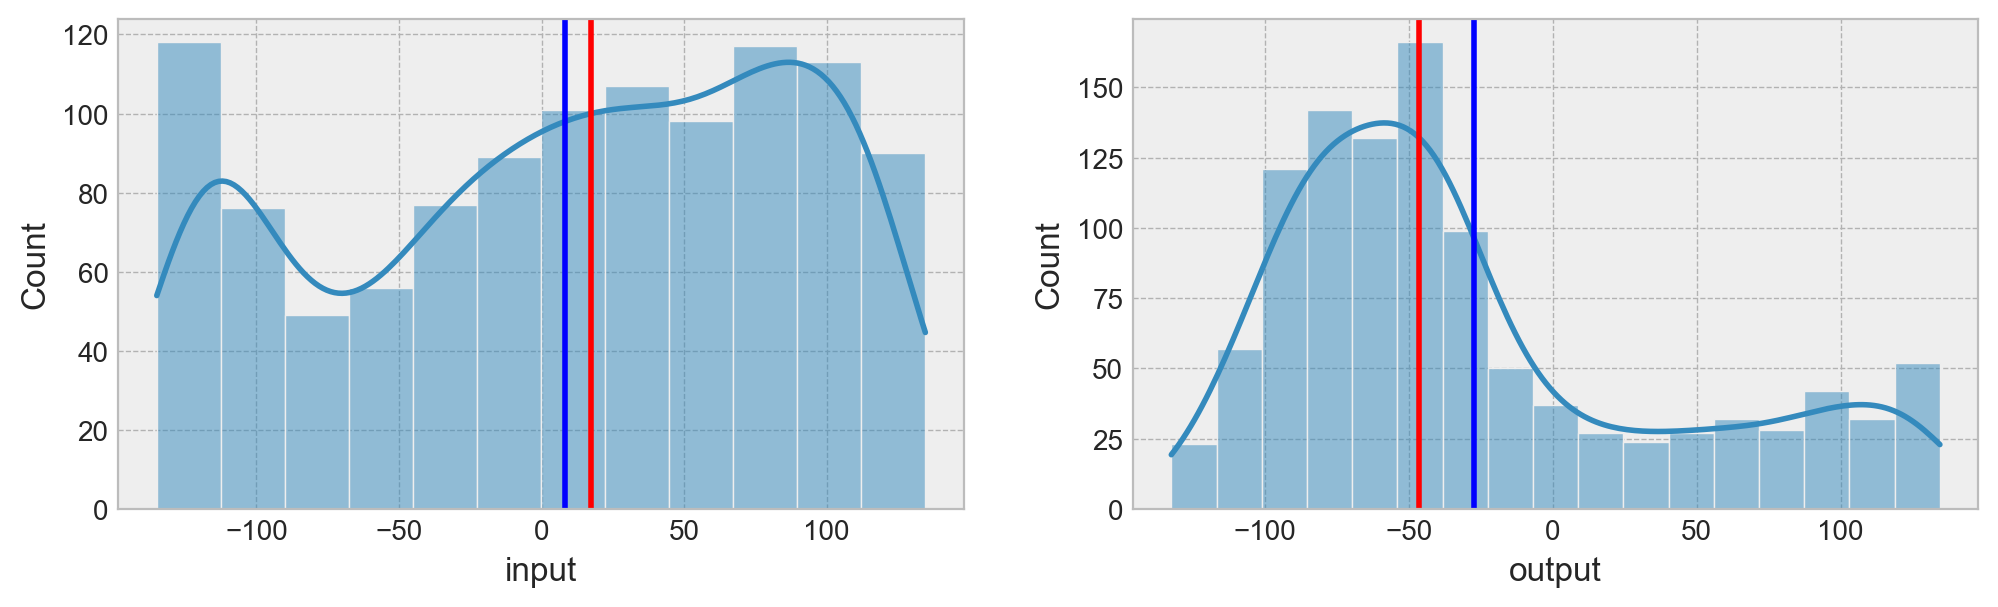

In [16]:
plt.figure(figsize=(12,7))

plt.subplot(221)
sns.histplot(df.input, kde=True)
plt.axvline(df.input.mean(), color = 'blue')
plt.axvline(df.input.median(), color = 'red')

plt.subplot(222)
sns.histplot(df.output, kde= True)
plt.axvline(df.output.mean(), color = 'blue')
plt.axvline(df.output.median(), color = 'red');

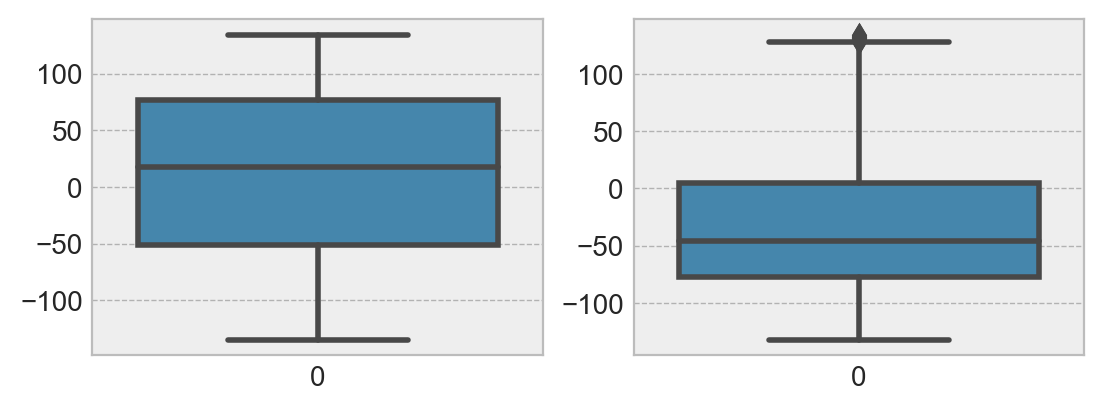

In [17]:
plt.subplot(221)
sns.boxplot(df.input)

plt.subplot(222)
sns.boxplot(df.output);

In [18]:
Q1, Q2, Q3 = tuple(df.input.quantile(q = [0.25,0.5,0.75]).values)
print(Q1, Q2, Q3)

-50.99419449 17.462087345 76.467547395


In [19]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)

df[(df.input > UL) | (df.input < LL)]

127.461741885 267.6601602225 -242.18680731749998


,input,output


In [20]:
Q4, Q5, Q6 = tuple(df.output.quantile(q = [0.25,0.5,0.75]).values)
print(Q4, Q5, Q6)

IQR = Q6-Q4
UL = Q6 + 1.5*IQR
LL = Q4-1.5*IQR

print(IQR, UL, LL)

df[(df.output > UL) | (df.output < LL)]

-76.9885951 -46.30093846 5.0754008045
82.0639959045 128.17139466125 -200.08458895675


,input,output
354,120.59,128.42
358,133.10,133.79
359,124.63,129.00
361,133.02,132.06
471,105.71,131.84
473,129.54,128.59
475,133.36,131.92
478,108.41,134.43
1056,122.83,129.43
1060,99.68,129.27


## Transformation Techniques

In [21]:
# Log Transformation
np.log(df.output)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1086   4.82
1087   4.85
1088   4.85
1089   4.81
1090    NaN
Name: output, Length: 1091, dtype: float64

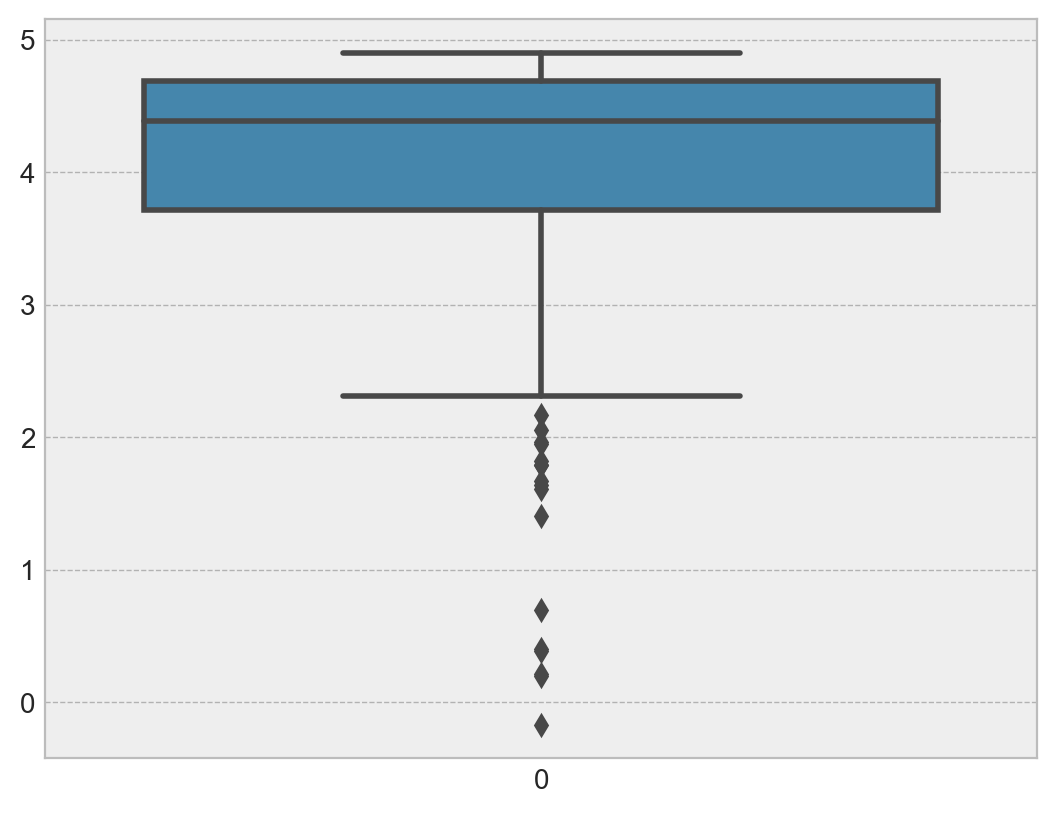

In [22]:
sns.boxplot(np.log(df.output));

In [23]:
# Cube Root Transformation
df.output**(1/3)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1086   4.98
1087   5.03
1088   5.04
1089   4.97
1090    NaN
Name: output, Length: 1091, dtype: float64

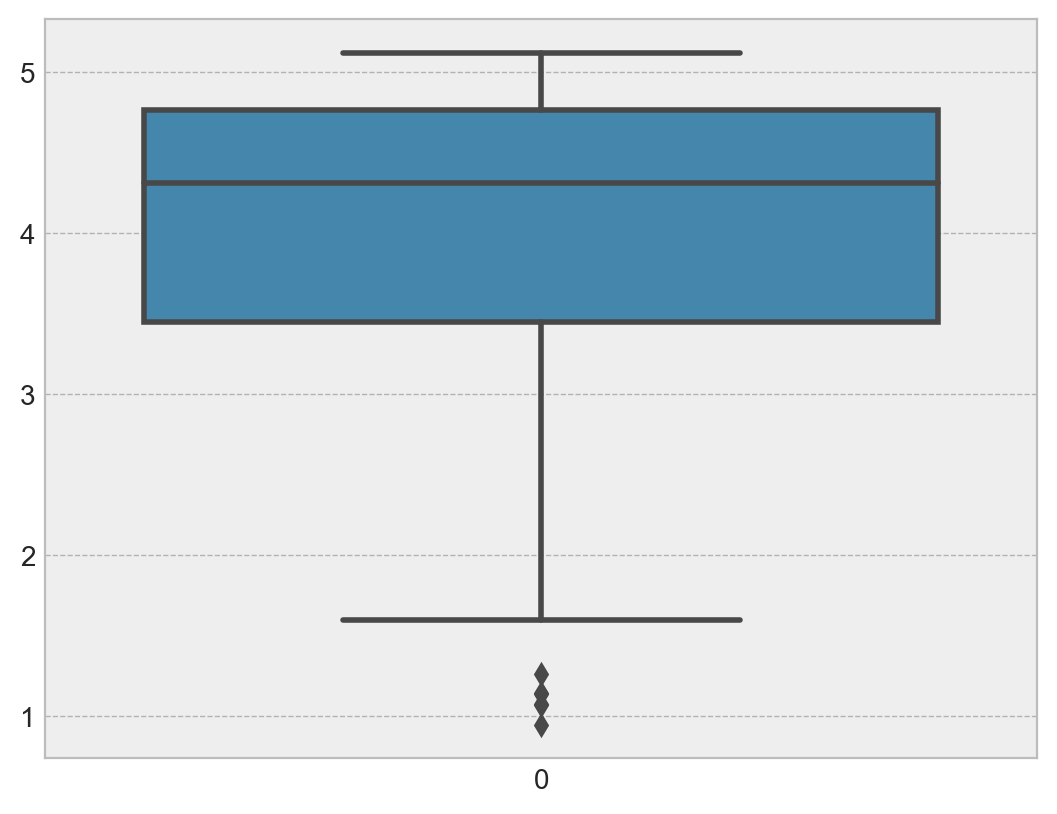

In [24]:
sns.boxplot(df.output**(1/3));

In [25]:
(df.output**(1/3)).skew()
df.output.skew()

-1.0604091448640767

0.9233018088886171

In [26]:
df["Output_cuberoot"] = df.output**(1/3)

In [27]:
df

,input,output,Output_cuberoot
0,-122.74,-130.57,NaN
1,-121.53,-129.94,NaN
2,-134.92,-130.14,NaN
3,-120.61,-125.76,NaN
4,-129.89,-112.79,NaN
...,...,...,...
1086,-119.95,123.61,4.98
1087,-109.94,127.20,5.03
1088,-111.52,128.17,5.04
1089,-110.34,123.09,4.97


In [28]:
df.isna().sum()

input                0
output               0
Output_cuberoot    810
dtype: int64

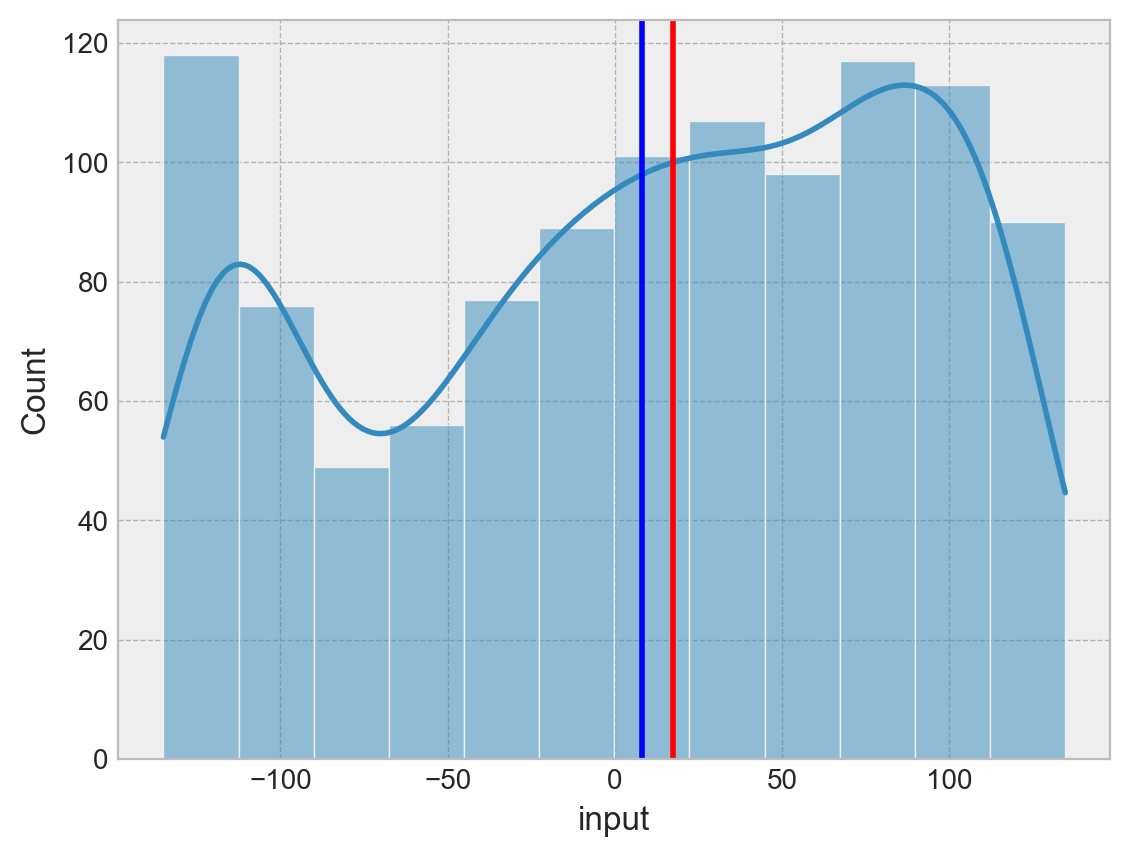

In [29]:
sns.histplot(df.input, kde=True)
plt.axvline(df.input.mean(), color = 'blue')
plt.axvline(df.input.median(), color = 'red');

In [30]:
df.Output_cuberoot.fillna(df.Output_cuberoot.mean(), inplace=True)

## Analysis

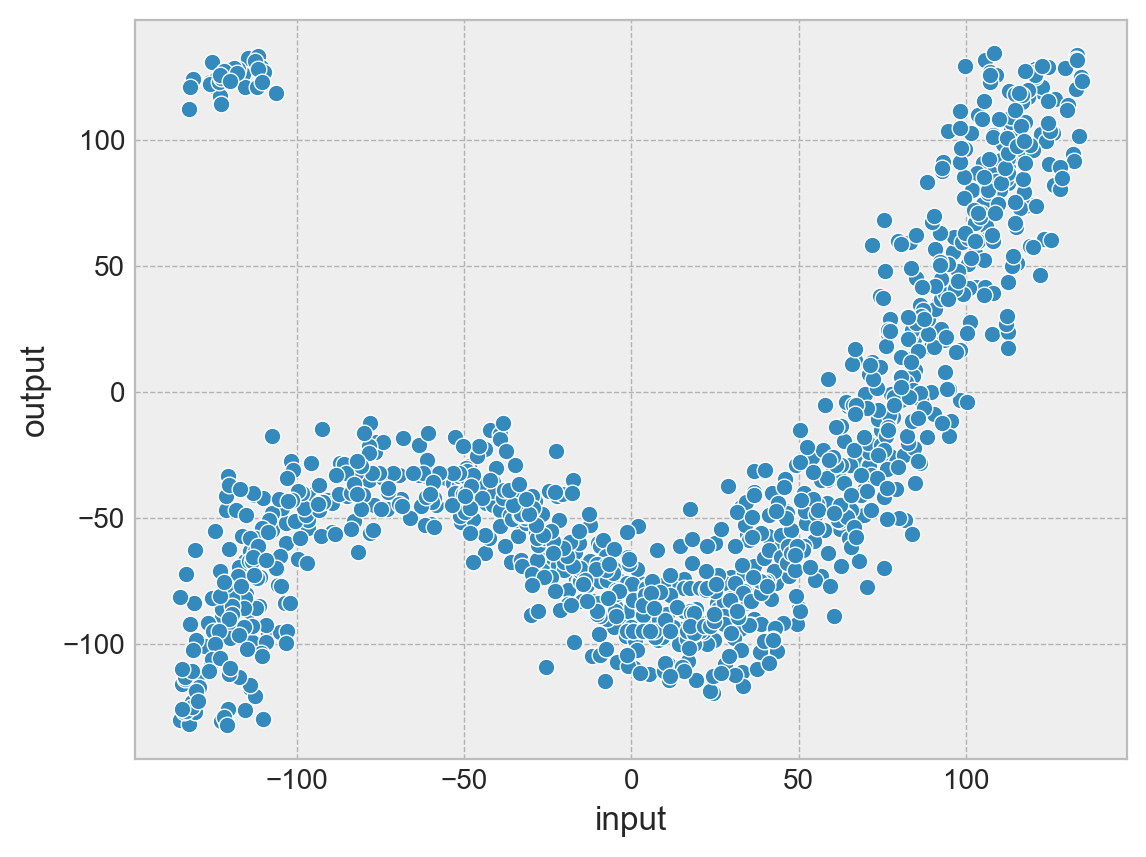

In [99]:
sns.scatterplot(x=df.input,y=df.output);

### Conclusion:
- Cube Root is working but getting null values and filling with mean.
- by using these data we bulid Regressor model.

## Machine Learning 

## Identifying the Input and Output Variables

In [31]:
df

,input,output,Output_cuberoot
0,-122.74,-130.57,4.00
1,-121.53,-129.94,4.00
2,-134.92,-130.14,4.00
3,-120.61,-125.76,4.00
4,-129.89,-112.79,4.00
...,...,...,...
1086,-119.95,123.61,4.98
1087,-109.94,127.20,5.03
1088,-111.52,128.17,5.04
1089,-110.34,123.09,4.97


In [32]:
X = df[['input']]
y = df['output']

In [33]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 420)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


In [34]:
X_train

,input
198,-27.49
556,52.25
615,9.33
501,103.63
227,18.26
...,...
627,-1.50
799,-120.47
575,46.06
390,57.81


## Scaling the Numerical Features

In [35]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

,input
198,-0.44
556,0.56
615,0.03
501,1.21
227,0.14


### Preparing Test Data

In [36]:
X_test.head()
print('='*45)
X_test.info()

,input
232,25.06
141,-43.37
904,0.54
244,34.48
780,-98.37


<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 232 to 600
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [37]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,input
232,0.22
141,-0.64
904,-0.09
244,0.34
780,-1.33


### Training the data
### Linear Regression

In [38]:
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [39]:
y_test_pred = regressor.predict(X_test_transformed)

In [40]:
linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

linear_df.head()

,Actual,Predicted
232,-60.15,-19.85
141,-44.00,-49.68
904,-82.70,-30.54
244,-56.54,-15.75
780,-40.00,-73.65


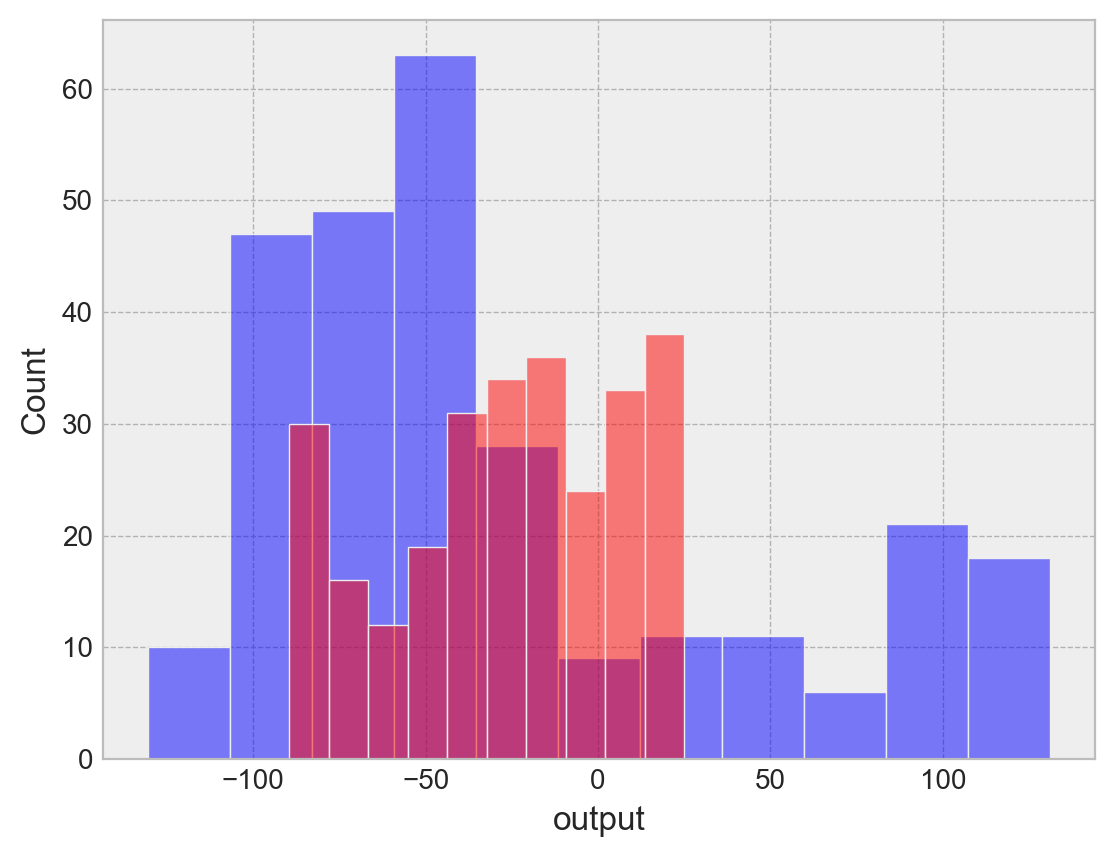

In [41]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [42]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  46.16570427523341
Mean Squared Error:  3551.0144150584724
Root Mean Squared Error:  59.59038861308485
R Squared Error:  0.4910882998501905


In [43]:
LinearRegression_mae = metrics.mean_absolute_error(y_test, y_test_pred)
LinearRegression_mse = metrics.mean_squared_error(y_test, y_test_pred)
LinearRegression_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
LinearRegression_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

### KNN Regression

In [44]:
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [45]:
y_test_pred = regressor.predict(X_test_transformed)

In [46]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
knn_df.head()

,Actual,Predicted
232,-60.15,-92.57
141,-44.00,-48.45
904,-82.70,-91.59
244,-56.54,-73.18
780,-40.00,-51.42


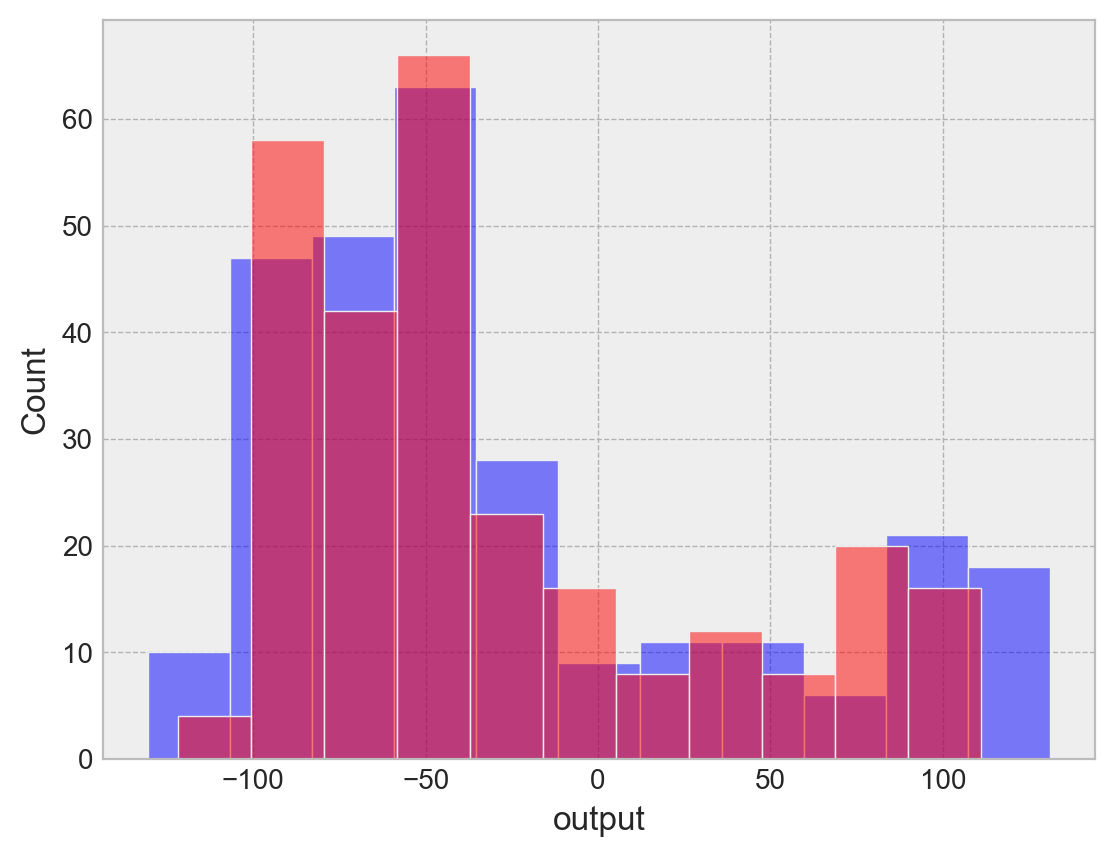

In [47]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [48]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  24.111573846345056
Mean Squared Error:  1409.0164915224836
Root Mean Squared Error:  37.53686842988482
R Squared Error:  0.8360029382255951


In [49]:
KNeighborsRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
KNeighborsRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
KNeighborsRegressor_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
KNeighborsRegressor_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

### Decision Tree Regression

In [50]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [51]:
y_test_pred = regressor.predict(X_test_transformed)
dtr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dtr_df.head()

,Actual,Predicted
232,-60.15,-98.48
141,-44.00,-41.31
904,-82.70,-95.00
244,-56.54,-82.94
780,-40.00,-45.74


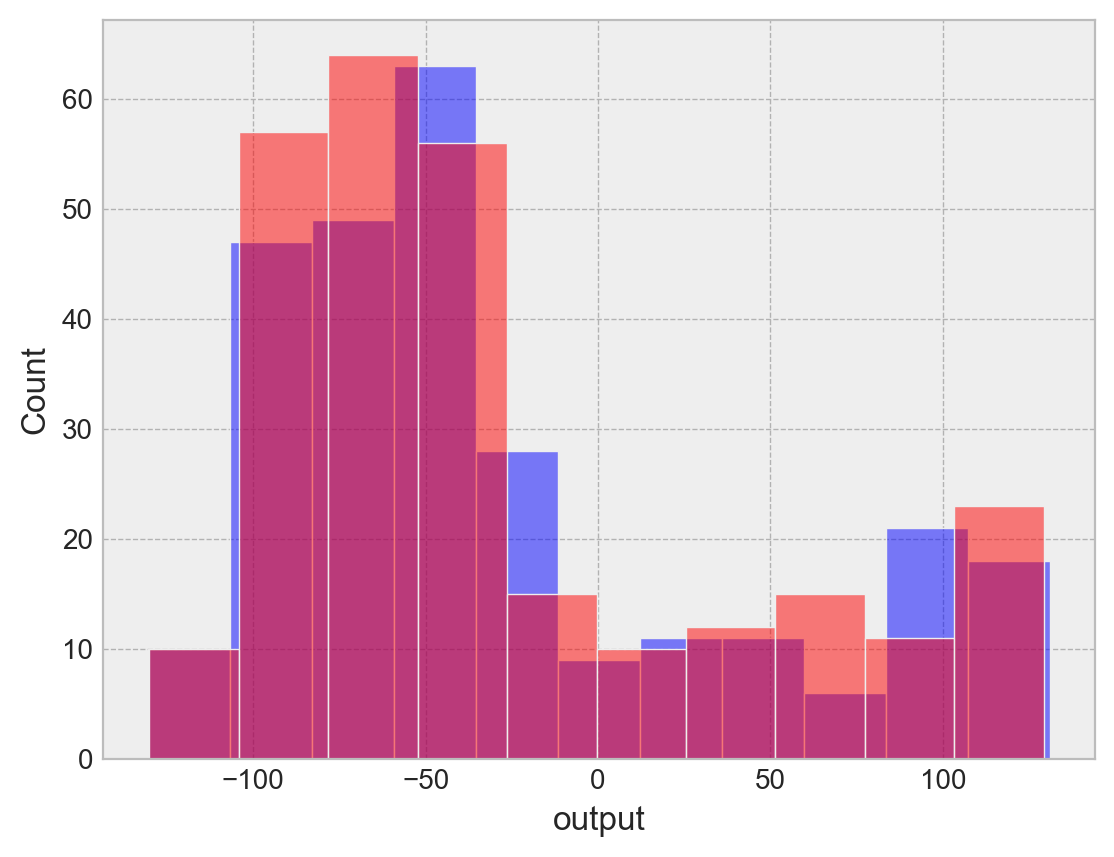

In [52]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [53]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  26.365532519024423
Mean Squared Error:  2126.035946318044
Root Mean Squared Error:  46.10895733280079
R Squared Error:  0.7387000693188046


In [54]:
DecisionTreeRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
DecisionTreeRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
DecisionTreeRegressor_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
DecisionTreeRegressor_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

### Random Forest Regression

In [55]:
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [56]:
y_test_pred = regressor.predict(X_test_transformed)
rfr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

rfr_df.head()

,Actual,Predicted
232,-60.15,-93.63
141,-44.00,-42.72
904,-82.70,-93.15
244,-56.54,-73.06
780,-40.00,-47.08


In [57]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  24.113579969204693
Mean Squared Error:  1600.2268282577693
Root Mean Squared Error:  40.00283525273889
R Squared Error:  0.811196840294837


In [58]:
RandomForestRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
RandomForestRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
RandomForestRegressor_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
RandomForestRegressor_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

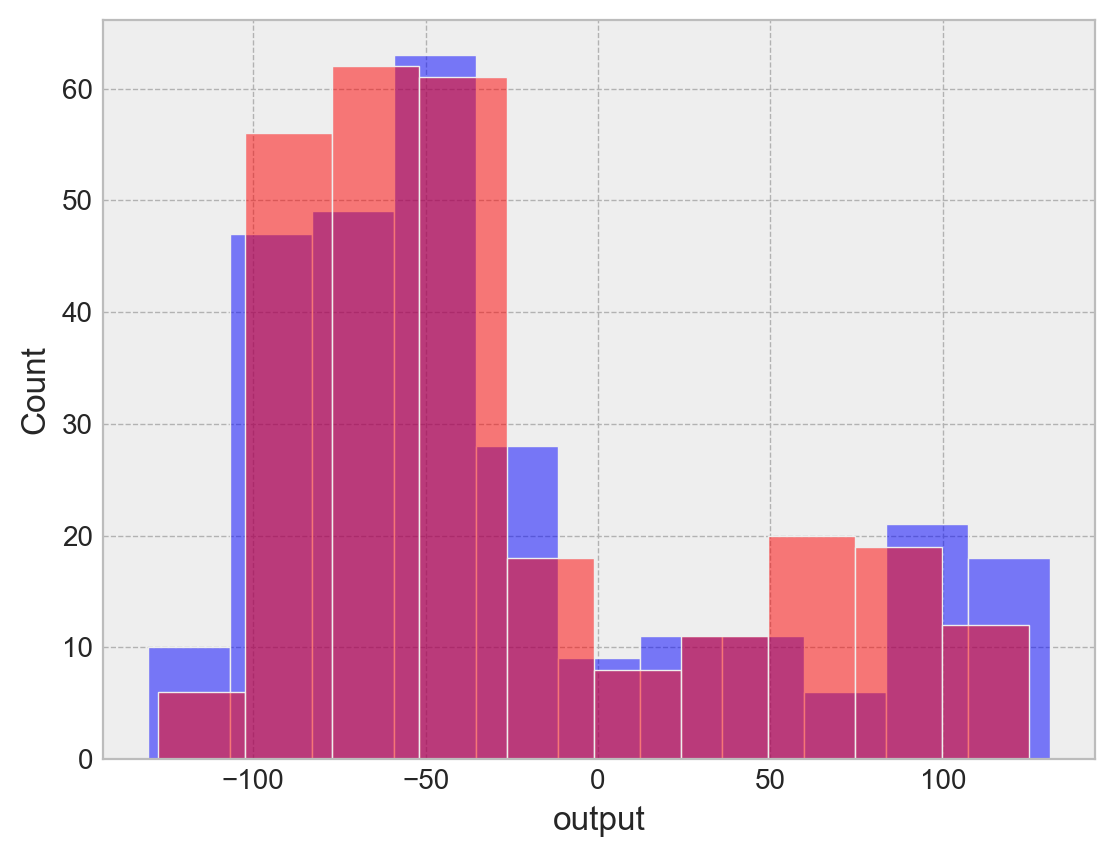

In [59]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### Support Vector Regression

In [60]:
regressor = SVR()
regressor.fit(X_train_transformed, y_train)

SVR()

In [61]:
y_test_pred = regressor.predict(X_test_transformed)
svc_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

svc_df.head()

,Actual,Predicted
232,-60.15,-76.74
141,-44.00,-49.77
904,-82.70,-77.81
244,-56.54,-69.93
780,-40.00,-49.55


In [62]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  25.86101471776656
Mean Squared Error:  1656.9713734567551
Root Mean Squared Error:  40.705913249265826
R Squared Error:  0.8036879468933452


In [63]:
SVR_mae = metrics.mean_absolute_error(y_test, y_test_pred)
SVR_mse = metrics.mean_squared_error(y_test, y_test_pred)
SVR_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
SVR_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

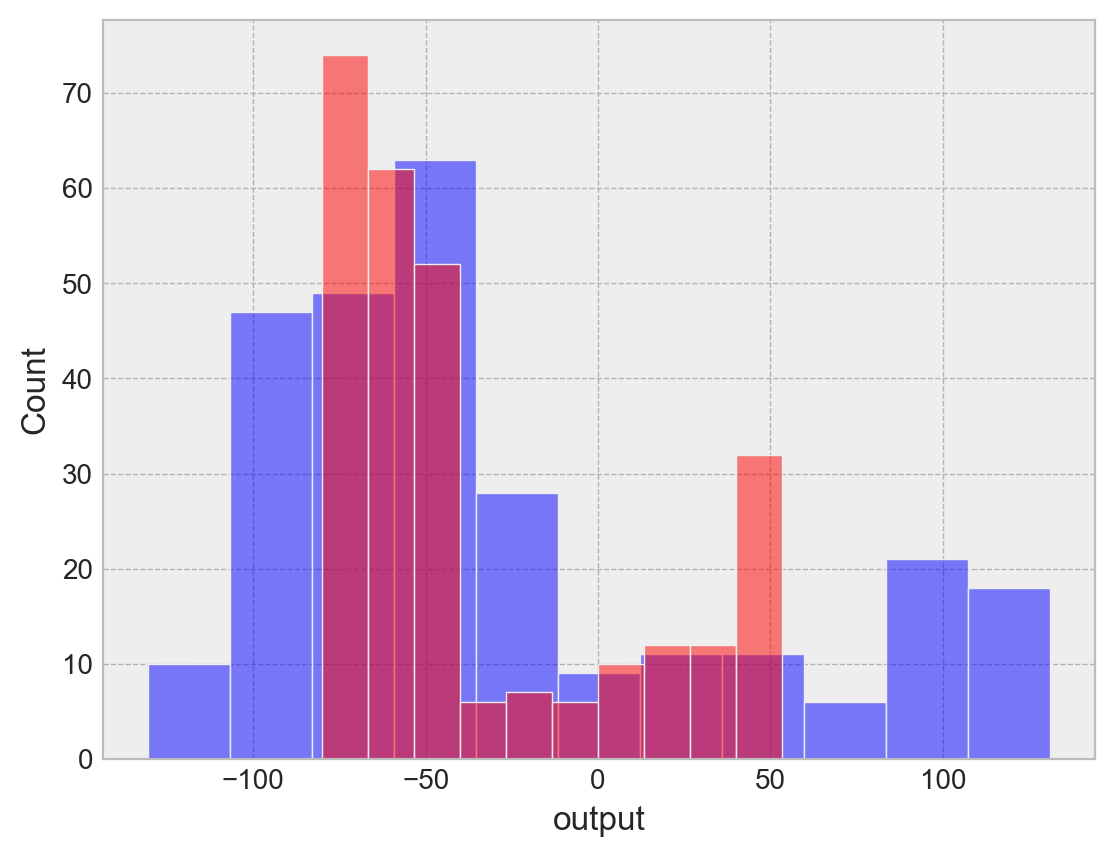

In [64]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## GradientBoostingRegressor

In [65]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

GradientBoostingRegressor()

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  21.72697992464338
Mean Squared Error:  1290.949324461465
Root Mean Squared Error:  35.92978325096695
R Squared Error:  0.850958999019172


In [67]:
GradientBoostingRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
GradientBoostingRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
GradientBoostingRegressor_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
GradientBoostingRegressor_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

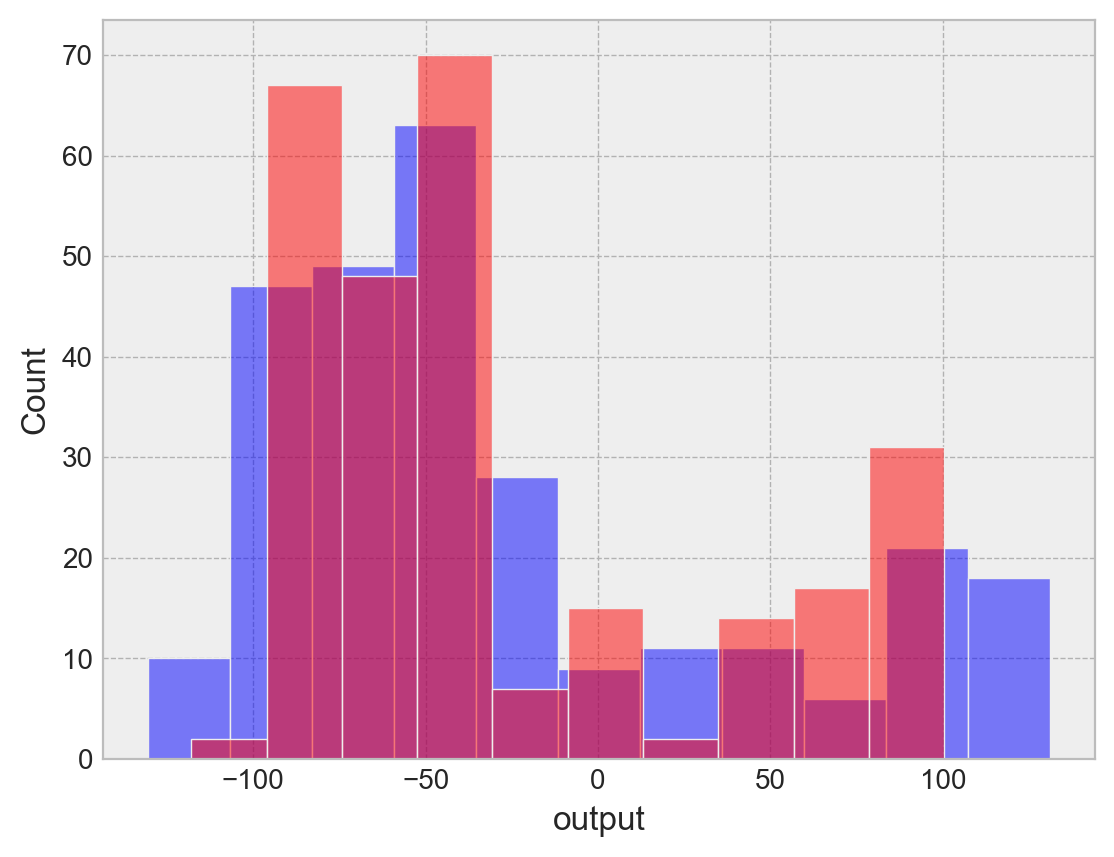

In [68]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

### ADA Boost Classifier

In [69]:
from sklearn.ensemble import AdaBoostRegressor
classifier = AdaBoostRegressor()
classifier.fit(X_train_transformed, y_train)

AdaBoostRegressor()

In [70]:
y_test_predicted = classifier.predict(X_test_transformed)

In [71]:
adr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predicted})
adr_df.head()

,Actual,Predicted
232,-60.15,-65.62
141,-44.00,-61.73
904,-82.70,-65.62
244,-56.54,-65.62
780,-40.00,-61.73


In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  21.72697992464338
Mean Squared Error:  1290.949324461465
Root Mean Squared Error:  35.92978325096695
R Squared Error:  0.850958999019172


In [73]:
AdaBoostRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
AdaBoostRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
AdaBoostRegressor_s   = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
AdaBoostRegressor_r2  = np.sqrt(metrics.r2_score(y_test, y_test_pred))

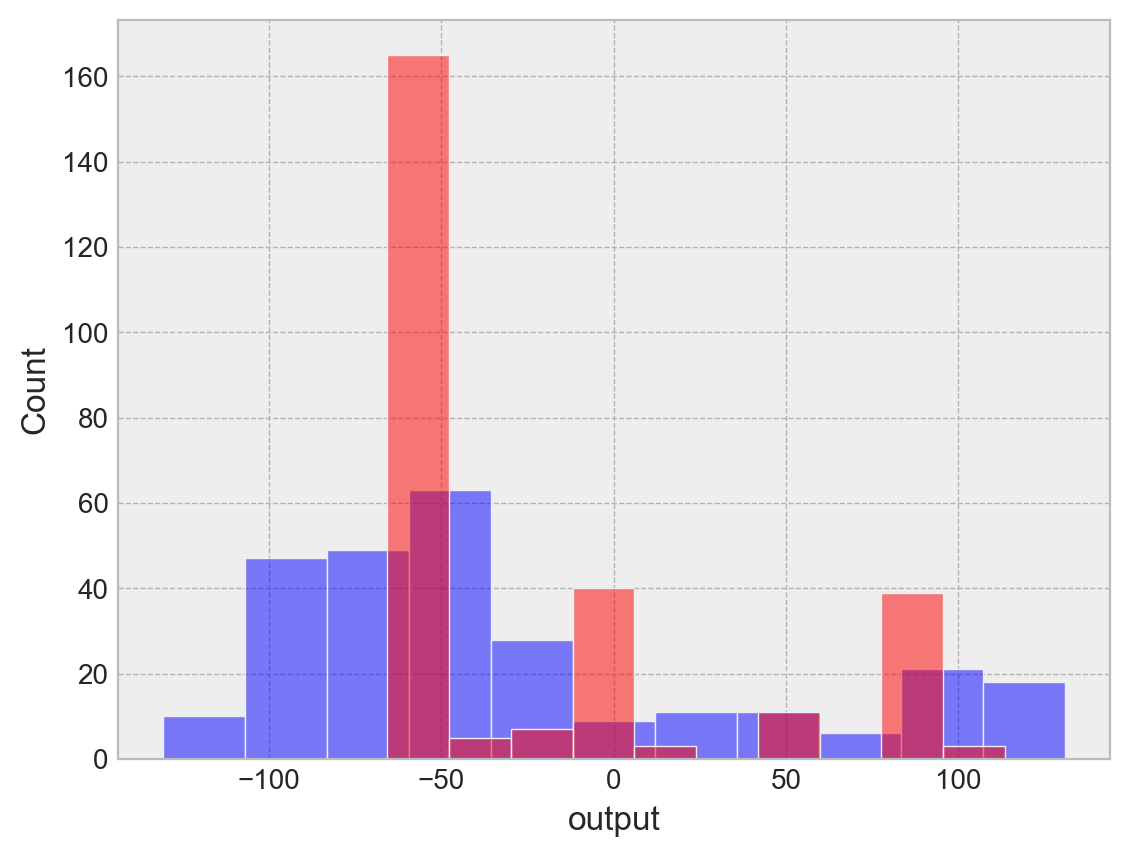

In [74]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

### Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingRegressor
classifier = BaggingRegressor()
classifier.fit(X_train_transformed, y_train)

BaggingRegressor()

In [76]:
y_test_predicted = classifier.predict(X_test_transformed)

In [77]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


print('R Squared Error: ', np.sqrt(metrics.r2_score(y_test, y_test_pred)))

Mean Absolute Error:  21.72697992464338
Mean Squared Error:  1290.949324461465
Root Mean Squared Error:  35.92978325096695
R Squared Error:  0.850958999019172


In [78]:
BaggingRegressor_mae = metrics.mean_absolute_error(y_test, y_test_pred)
BaggingRegressor_mse = metrics.mean_squared_error(y_test, y_test_pred)
BaggingRegressor_s = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
BaggingRegressor_r2 = np.sqrt(metrics.r2_score(y_test, y_test_pred))

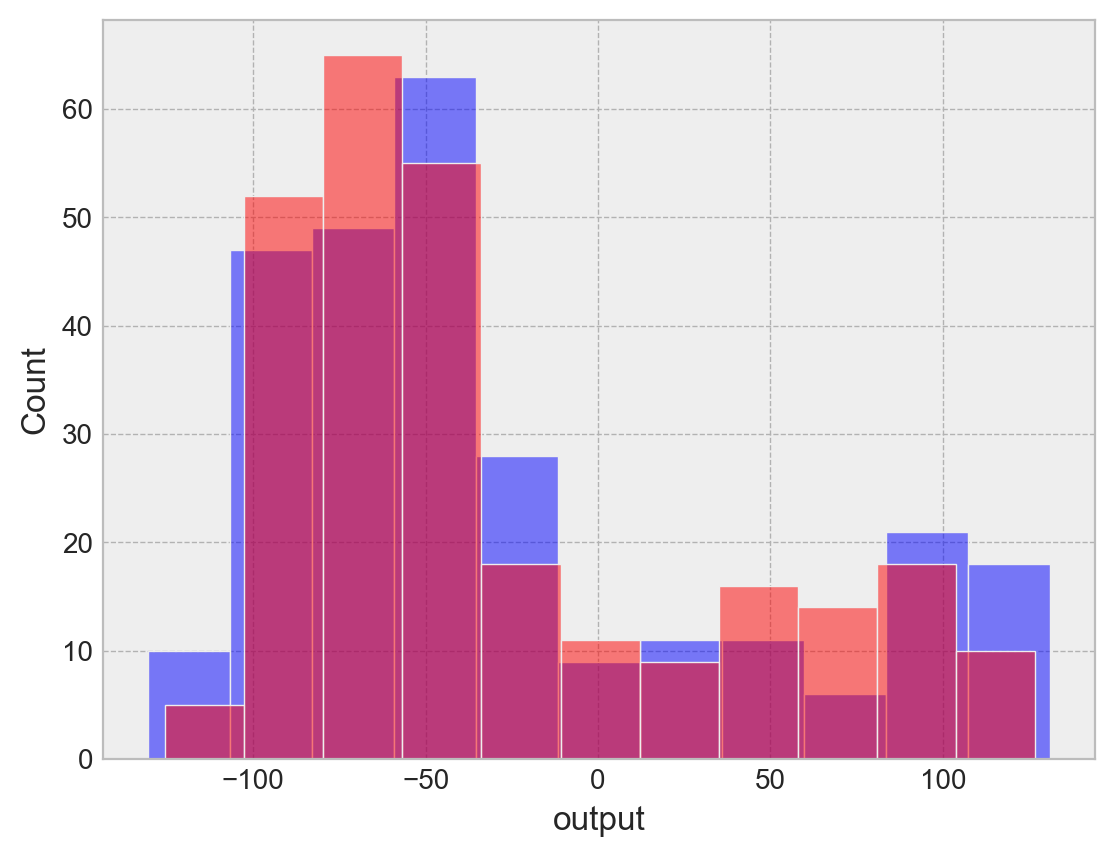

In [79]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predicted, color='red', alpha=0.5);

In [83]:
Results = pd.DataFrame({"Algorithm": ["LogisticRegression", "KNeighborsRegressor", "DecisionTreeRegressor", 
                                      "RandomForestRegressor", "Support Vector Regressor","GradientBoostingRegressor",
                                     "AdaBoostRegressor","BaggingRegressor"],
                    "Mean Absolute Error": [LinearRegression_mae, KNeighborsRegressor_mae,DecisionTreeRegressor_mae,
                                            RandomForestRegressor_mae,SVR_mae,GradientBoostingRegressor_mae,
                                            AdaBoostRegressor_mae, BaggingRegressor_mae],
                   'Mean Squared Error' : [LinearRegression_mse,KNeighborsRegressor_mse,DecisionTreeRegressor_mse
                                          ,RandomForestRegressor_mse,SVR_mse,GradientBoostingRegressor_mse, 
                                              AdaBoostRegressor_mse, BaggingRegressor_mse],
            'Root Mean Squared Error' : [LinearRegression_s  ,KNeighborsRegressor_s ,DecisionTreeRegressor_s ,
                                         RandomForestRegressor_s,SVR_s,GradientBoostingRegressor_s, 
                                         AdaBoostRegressor_s, BaggingRegressor_s],
                'R Squared Error' : [LinearRegression_r2,KNeighborsRegressor_r2 ,DecisionTreeRegressor_r2,
                                     RandomForestRegressor_r2,SVR_r2,GradientBoostingRegressor_r2, AdaBoostRegressor_r2, 
                                     BaggingRegressor_r2]})
                     

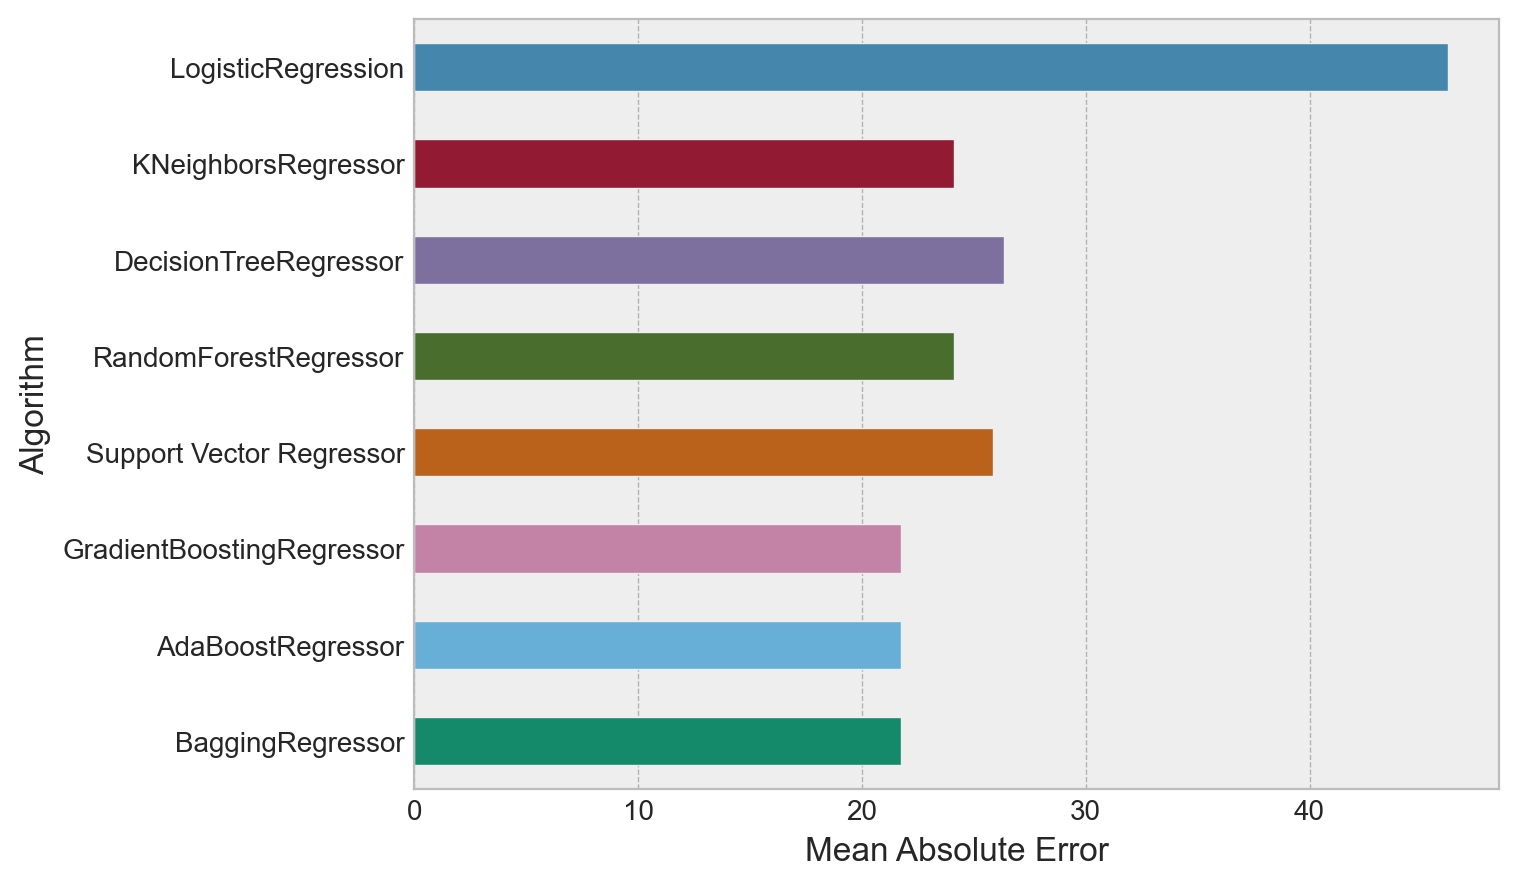

In [84]:
plt.figure(figsize=(7,5))
sns.barplot(x=Results['Mean Absolute Error'], y=Results.Algorithm,width=0.5, orient='h');

In [85]:
Results.sort_values(by="Mean Absolute Error", ascending=True, ignore_index=True)

,Algorithm,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R Squared Error
0,GradientBoostingRegressor,21.73,1290.95,35.93,0.85
1,AdaBoostRegressor,21.73,1290.95,35.93,0.85
2,BaggingRegressor,21.73,1290.95,35.93,0.85
3,KNeighborsRegressor,24.11,1409.02,37.54,0.84
4,RandomForestRegressor,24.11,1600.23,40.00,0.81
5,Support Vector Regressor,25.86,1656.97,40.71,0.80
6,DecisionTreeRegressor,26.37,2126.04,46.11,0.74
7,LogisticRegression,46.17,3551.01,59.59,0.49


## Conclusion:
*  The results of the evaluation using mean absolute error as the metric show that **`GradientBoostingRegressor`, `AdaBoostRegressor` `BaggingRegressor`** Performing well compared to other models, with a score of **21.73** and also R^2 also suggesting upto **85%**

* **`KNeighborsRegressor`** is the second-best performance, with a score of **24.73.**

*  These results suggest that **`GradientBoostingRegressor`, `AdaBoostRegressor`, `BaggingRegressor`** these three may be the most effective model for this particular task, 
* Although further evaluation and validation is necessary to confirm this conclusion.

## Bonus

In [86]:
X = df[['input']]
y = df['Output_cuberoot']

In [87]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 420)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


In [88]:
X_train

,input
198,-27.49
556,52.25
615,9.33
501,103.63
227,18.26
...,...
627,-1.50
799,-120.47
575,46.06
390,57.81


## Scaling the Numerical Features

In [89]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_transformed = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_transformed.head()

,input
198,-0.44
556,0.56
615,0.03
501,1.21
227,0.14


### Preparing Test Data

In [90]:
X_test.head()
print('='*45)
X_test.info()

,input
232,25.06
141,-43.37
904,0.54
244,34.48
780,-98.37


<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 232 to 600
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [91]:
X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_transformed.head()

,input
232,0.22
141,-0.64
904,-0.09
244,0.34
780,-1.33


### Training the data
### Linear Regression

In [92]:
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [93]:
y_test_pred = regressor.predict(X_test_transformed)

In [94]:
linear_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

linear_df.head()

,Actual,Predicted
232,4.00,3.98
141,4.00,4.03
904,4.00,4.00
244,4.00,3.98
780,4.00,4.06


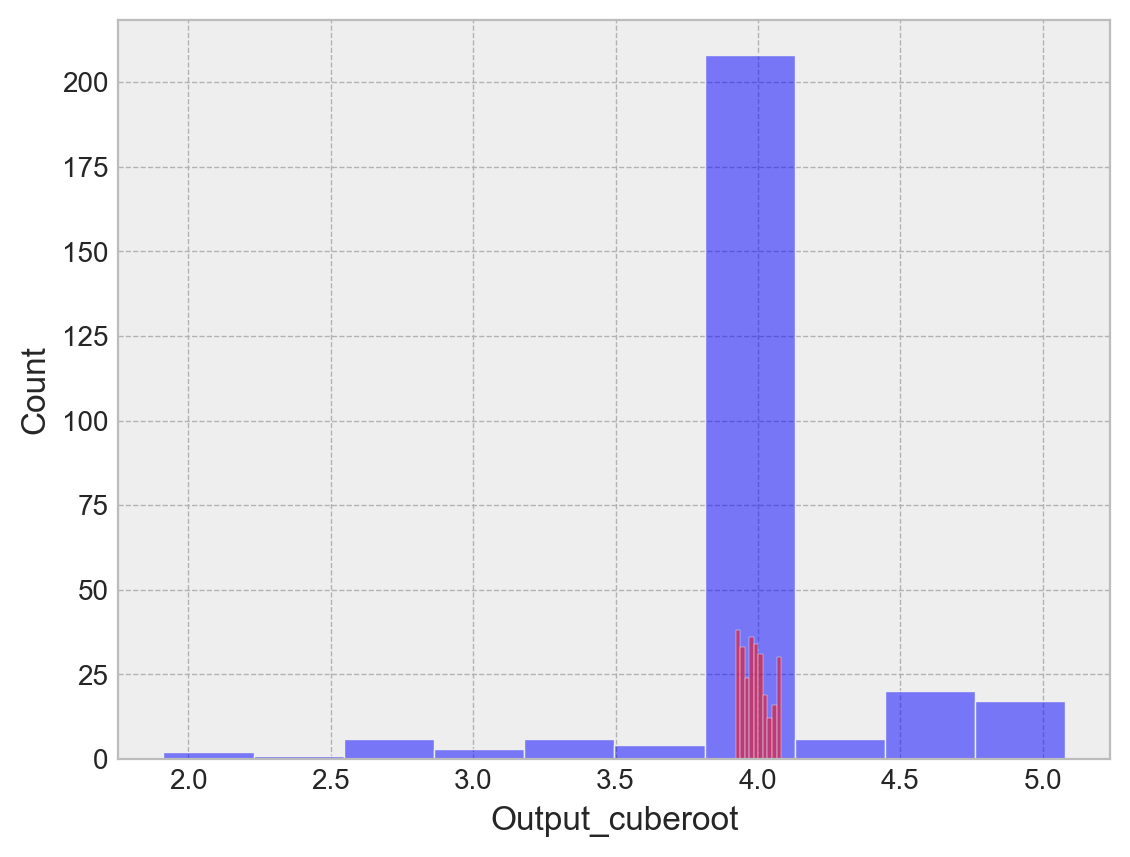

In [95]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [97]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.21459694233028548
Mean Squared Error:  0.18347197511044708
Root Mean Squared Error:  0.4283362874079747


## Conclusion:
*  The results of the evaluation using mean absolute error as the metric show that **Linear Regessor** Performing well 
compared to other models, with a score of **0.21**.